In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(seed=2017)

In [2]:
#reading data set
dataset=pd.read_csv('loan-prediction.csv')

In [3]:
#data cleaning
dataset['LoanAmount'].fillna(np.mean(dataset.LoanAmount),inplace=True)
dataset.fillna(method='ffill',inplace = True) #replace nan value by replaching exhisting prev value
#dataset.dropna(how='any',inplace=True)

In [4]:
#non numarical to numarical conversion
d=dataset
d.Property_Area.replace(['Urban','Semiurban','Rural'],[2,1,0],inplace=True)
d.Married.replace(['Yes','No'],[1,0],inplace=True)
d.Gender.replace(['Male','Female'],[1,0],inplace=True)
d.Education.replace(['Graduate','Not Graduate'],[1,0],inplace=True)
d.Self_Employed.replace(['Yes','No'],[1,0],inplace=True)
d.Dependents.replace(['0','1','2','3+'],[0,1,2,3],inplace=True)
d.Loan_Status.replace(['Y','N'],[1,0],inplace=True)

In [5]:
dataset=d
dataset.to_csv('loan-prediction1.csv',index=False)

In [6]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:,1:-1]
y = dataset.iloc[:,-1]
#split the data set for training and testing
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2017) #random state=same seed

In [7]:
from sklearn.preprocessing import StandardScaler
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_std=sc.transform(X)

C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [8]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

In [9]:
from sklearn.metrics import confusion_matrix, classification_report

In [10]:
dt_gini_best = DecisionTreeClassifier(criterion='gini',random_state=5)
dt_gini_best.fit(X_train_std, y_train)

print("Training set score DT_gini_best: %f" % dt_gini_best.score(X_train_std, y_train))
print("Test set score dt_gini_best: %f" % dt_gini_best.score(X_test_std, y_test))
print("Total score dt_gini_best: %f" % dt_gini_best.score(X_std, y))

print("Classification report for dt_gini_best:\n%s\n"% (classification_report(y_test, dt_gini_best.predict(X_test_std))))
print("Confusion matrix for dt_gini_best on test:\n%s" % (confusion_matrix(y_test, dt_gini_best.predict(X_test_std))))

print("Classification report for dt_gini_best:\n%s\n"% (classification_report(y_train, dt_gini_best.predict(X_train_std))))
print("Confusion matrix for dt_gini_best on train:\n%s" % (confusion_matrix(y_train, dt_gini_best.predict(X_train_std))))

print("Classification report for dt_gini_best:\n%s\n"% (classification_report(y, dt_gini_best.predict(X_std))))
print("Confusion matrix for dt_gini_best on total:\n%s" % (confusion_matrix(y, dt_gini_best.predict(X_std))))

from sklearn.model_selection import cross_val_score

cvs=cross_val_score(dt_gini_best , X_std, y, cv=10)
print(cvs)

Training set score DT_gini_best: 1.000000
Test set score dt_gini_best: 0.713514
Total score dt_gini_best: 0.913681
Classification report for dt_gini_best:
              precision    recall  f1-score   support

           0       0.54      0.38      0.44        56
           1       0.76      0.86      0.81       129

   micro avg       0.71      0.71      0.71       185
   macro avg       0.65      0.62      0.62       185
weighted avg       0.69      0.71      0.70       185


Confusion matrix for dt_gini_best on test:
[[ 21  35]
 [ 18 111]]
Classification report for dt_gini_best:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00       293

   micro avg       1.00      1.00      1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429


Confusion matrix for dt_gini_best on train:
[[136   0]
 [  0 293]]
Classification r

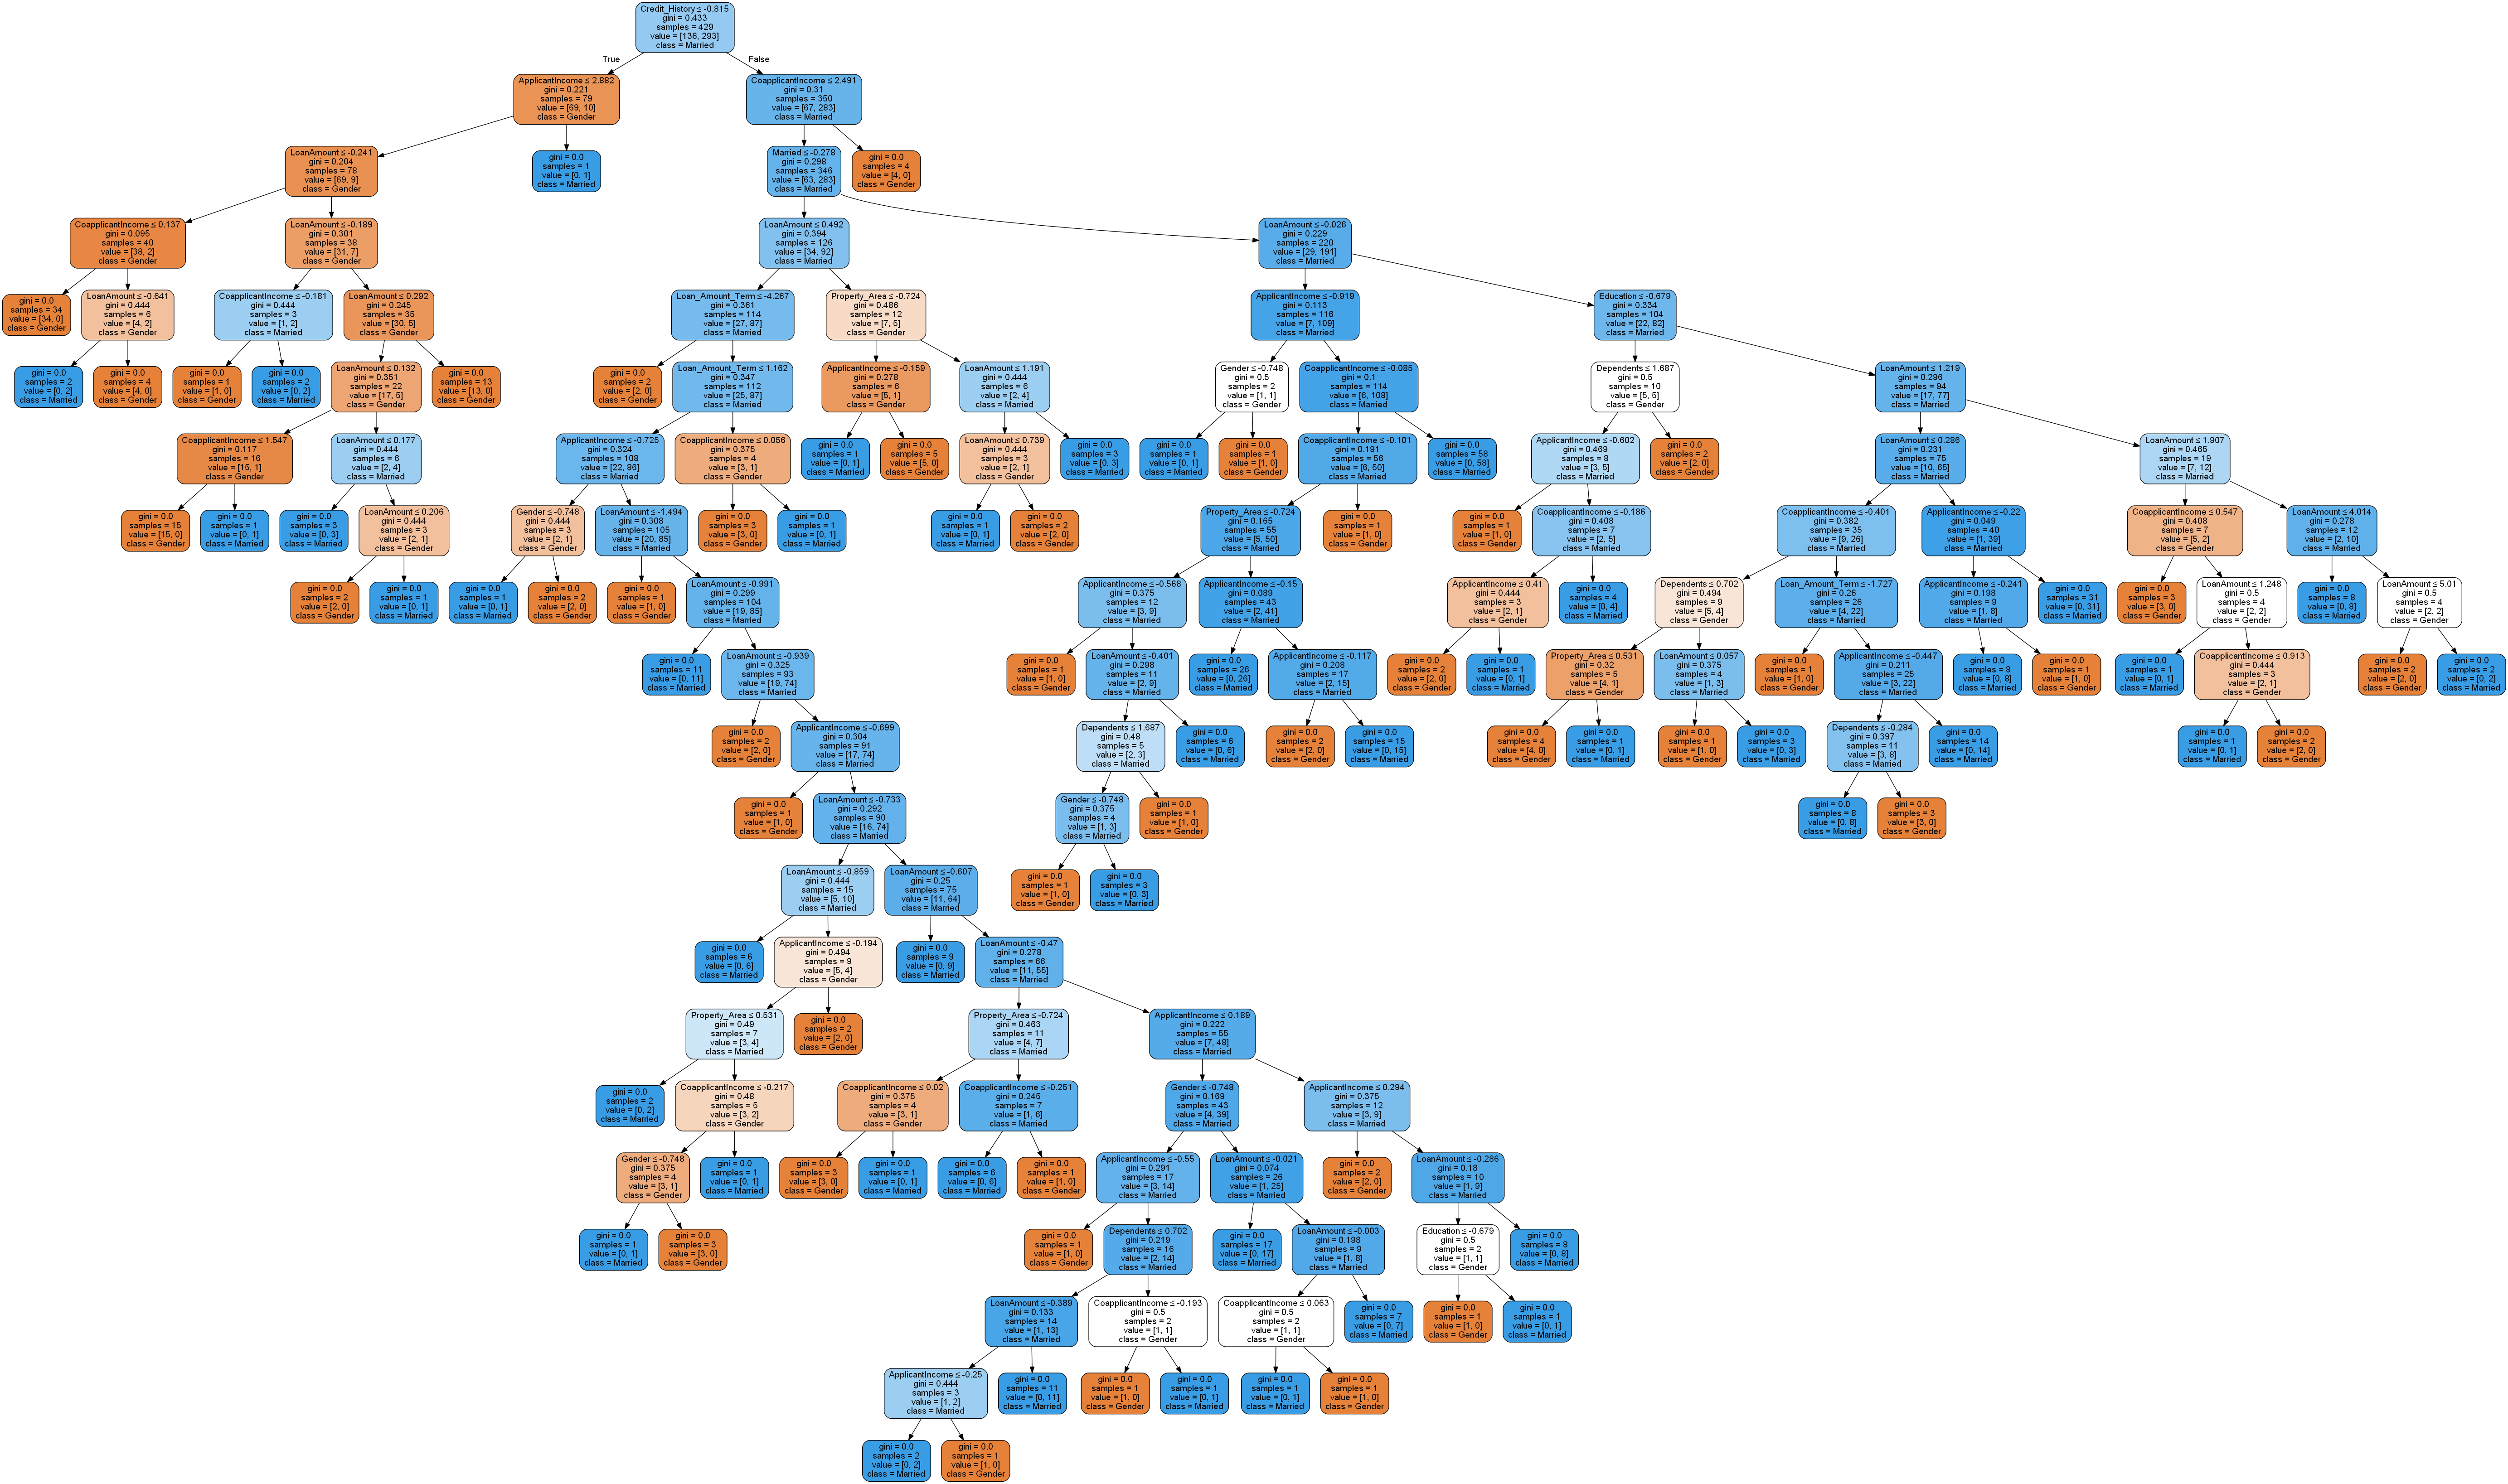

In [11]:
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image  

import os
import sys

def conda_fix(graph):
        path = os.path.join(sys.base_exec_prefix, "Library", "bin", "graphviz")
        paths = ("dot", "twopi", "neato", "circo", "fdp")
        paths = {p: os.path.join(path, "{}.exe".format(p)) for p in paths}
        graph.set_graphviz_executables(paths)
        
        
from sklearn import tree

buffer = StringIO()
tree.export_graphviz(dt_gini_best, out_file=buffer, 
                         feature_names=X.columns,  
                         class_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(buffer.getvalue())
conda_fix(graph)
graph.write_pdf("loan_tree_gini_best.pdf") 
Image(graph.create_png())

In [12]:
dt_entropy_best = DecisionTreeClassifier(criterion='entropy',random_state=5)
dt_entropy_best.fit(X_train_std, y_train)

print("Training set score DT_entropy_best: %f" % dt_entropy_best.score(X_train_std, y_train))
print("Test set score dt_entropy_best: %f" % dt_entropy_best.score(X_test_std, y_test))
print("Total score dt_entropy_best: %f" % dt_entropy_best.score(X_std, y))

print("Classification report for dt_entropy_best:\n%s\n"% (classification_report(y_test, dt_entropy_best.predict(X_test_std))))
print("Confusion matrix for dt_entropy_best on test:\n%s" % (confusion_matrix(y_test, dt_entropy_best.predict(X_test_std))))

print("Classification report for dt_entropy_best:\n%s\n"% (classification_report(y_train, dt_entropy_best.predict(X_train_std))))
print("Confusion matrix for dt_entropy_best on train:\n%s" % (confusion_matrix(y_train, dt_entropy_best.predict(X_train_std))))

print("Classification report for dt_entropy_best:\n%s\n"% (classification_report(y, dt_entropy_best.predict(X_std))))
print("Confusion matrix for dt_entropy_best on total:\n%s" % (confusion_matrix(y, dt_entropy_best.predict(X_std))))

from sklearn.model_selection import cross_val_score

cvs=cross_val_score(dt_entropy_best , X_std, y, cv=10)
print(cvs)

Training set score DT_entropy_best: 1.000000
Test set score dt_entropy_best: 0.729730
Total score dt_entropy_best: 0.918567
Classification report for dt_entropy_best:
              precision    recall  f1-score   support

           0       0.57      0.41      0.48        56
           1       0.77      0.87      0.82       129

   micro avg       0.73      0.73      0.73       185
   macro avg       0.67      0.64      0.65       185
weighted avg       0.71      0.73      0.72       185


Confusion matrix for dt_entropy_best on test:
[[ 23  33]
 [ 17 112]]
Classification report for dt_entropy_best:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00       293

   micro avg       1.00      1.00      1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429


Confusion matrix for dt_entropy_best on train:
[[136   0]
 [  0 2

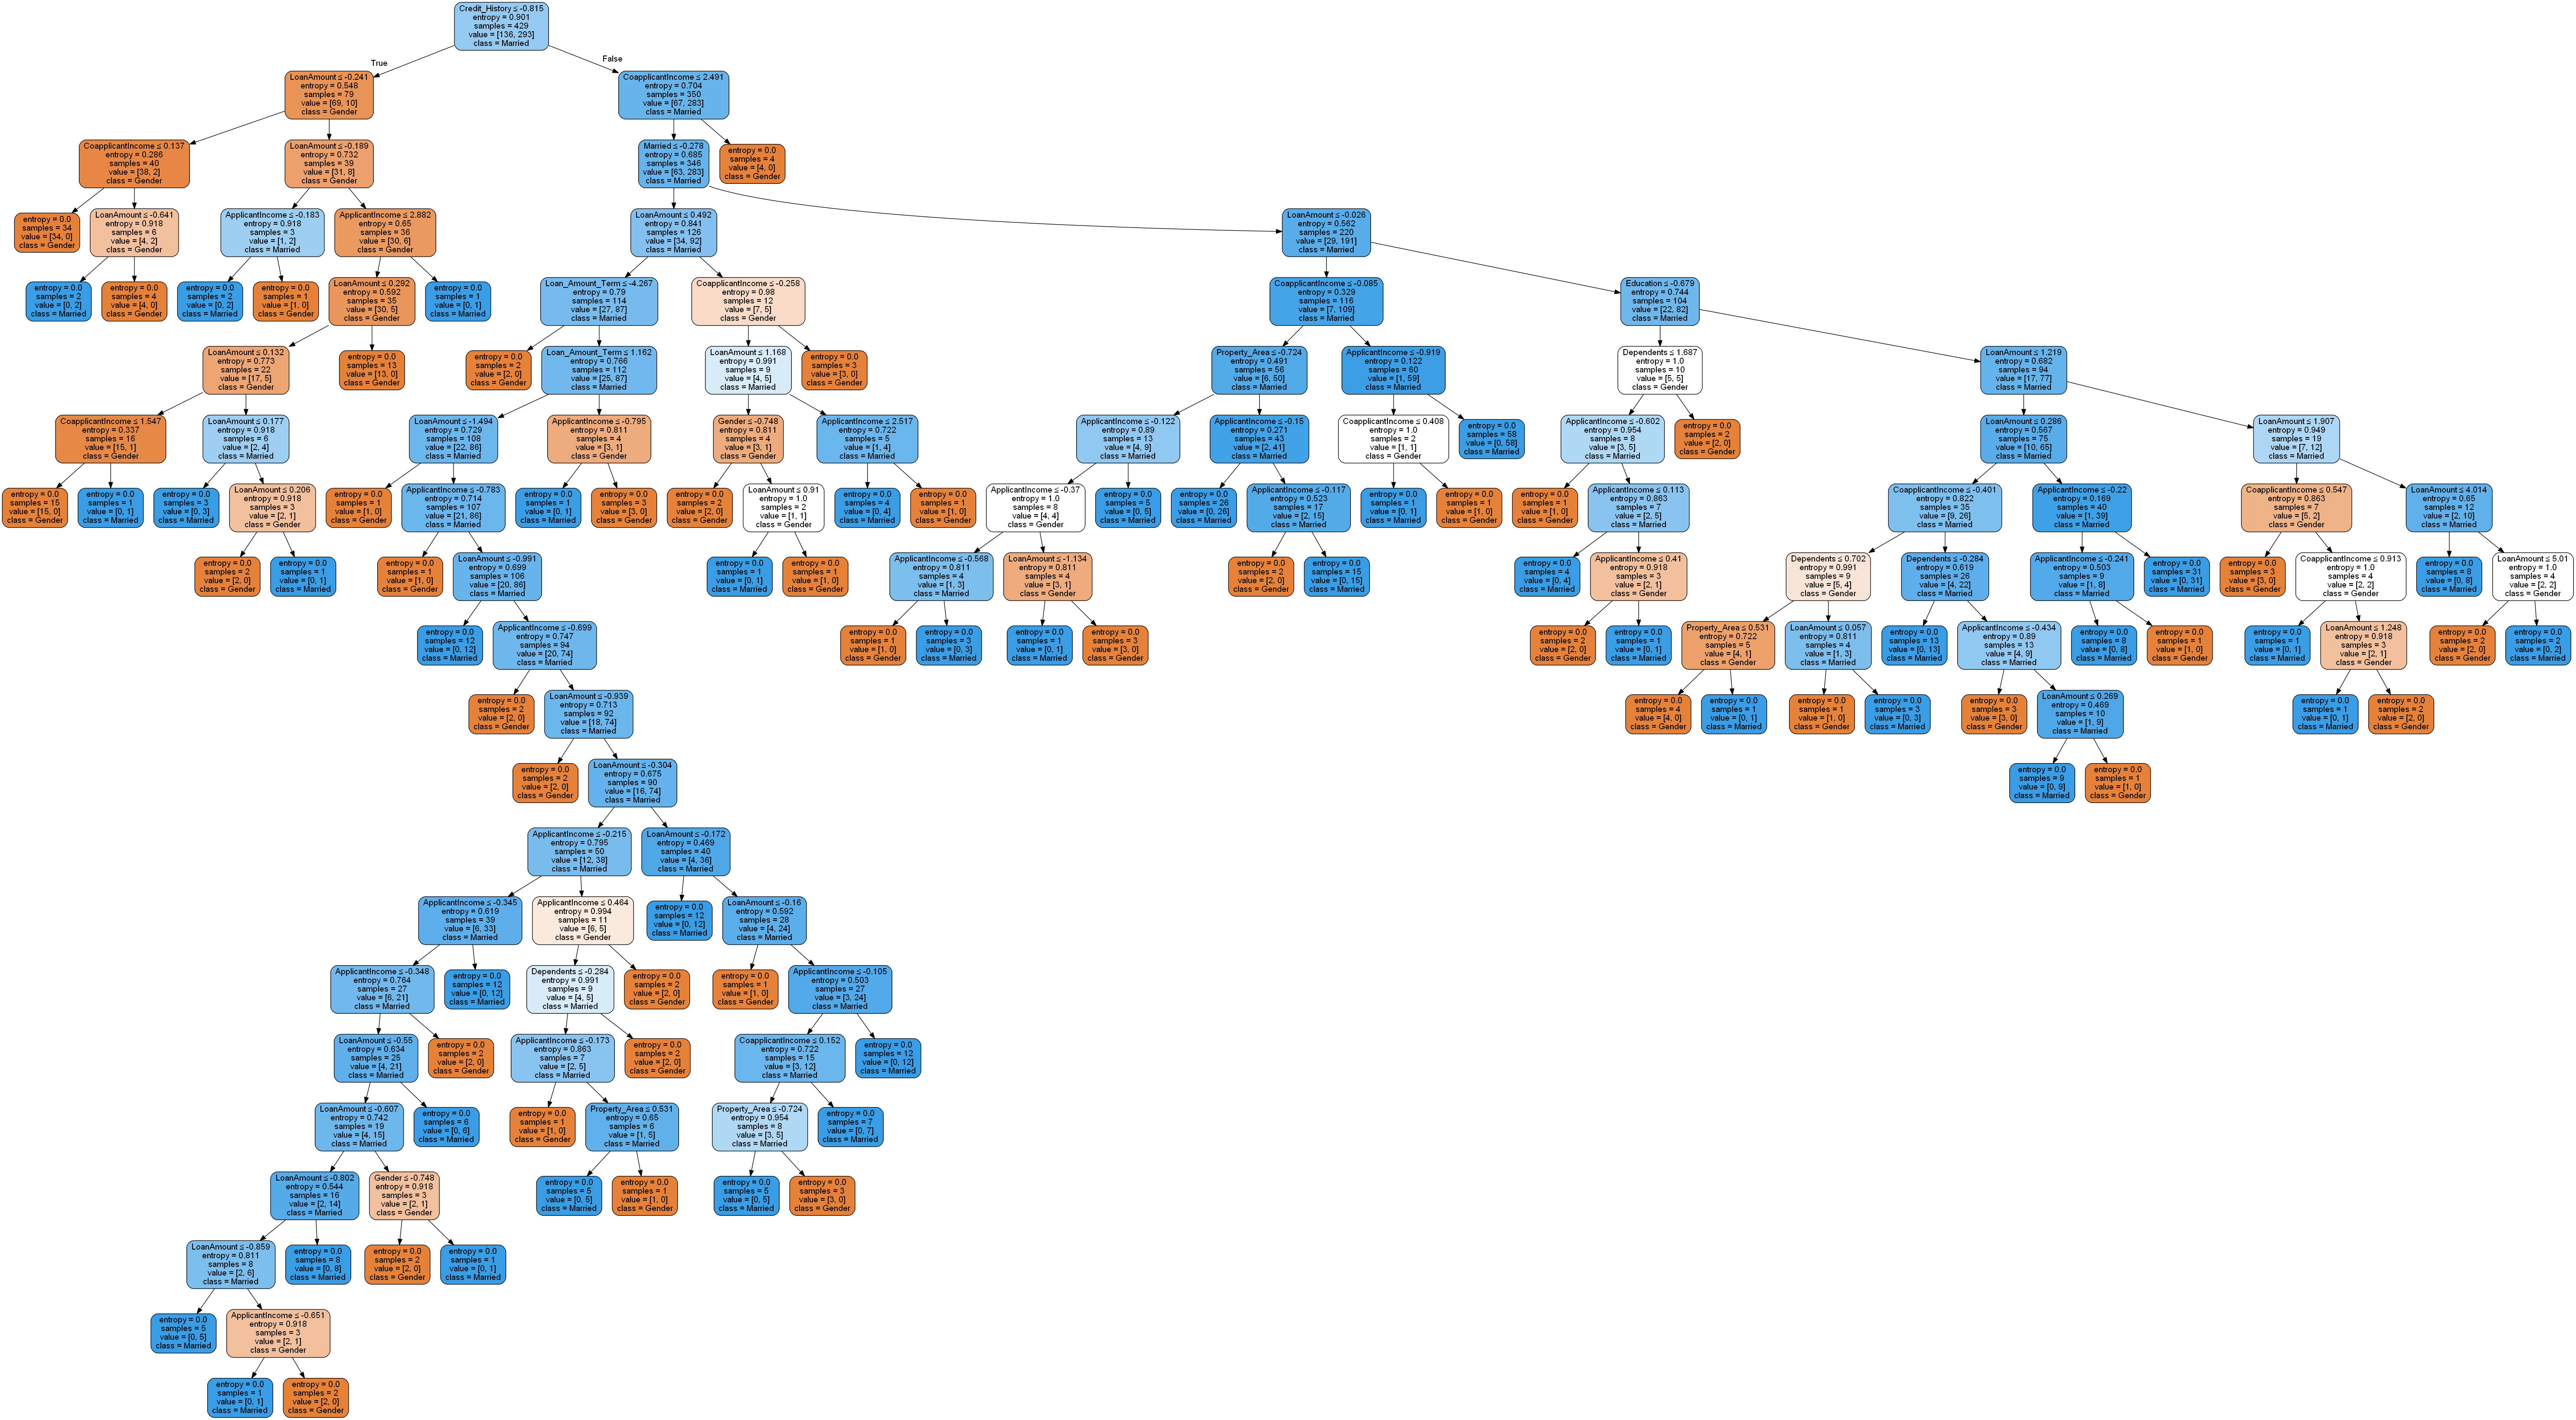

In [13]:
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image  

import os
import sys

def conda_fix(graph):
        path = os.path.join(sys.base_exec_prefix, "Library", "bin", "graphviz")
        paths = ("dot", "twopi", "neato", "circo", "fdp")
        paths = {p: os.path.join(path, "{}.exe".format(p)) for p in paths}
        graph.set_graphviz_executables(paths)
        
        
from sklearn import tree

buffer = StringIO()
tree.export_graphviz(dt_entropy_best, out_file=buffer, 
                         feature_names=X.columns,  
                         class_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(buffer.getvalue())
conda_fix(graph)
graph.write_pdf("loan_tree_entropy_best.pdf") 
Image(graph.create_png())

In [14]:
dt_gini_random = DecisionTreeClassifier(criterion='gini',random_state=5,splitter='random')
dt_gini_random.fit(X_train_std, y_train)

print("Training set score DT_gini_random: %f" % dt_gini_random.score(X_train_std, y_train))
print("Test set score dt_gini_random: %f" % dt_gini_random.score(X_test_std, y_test))
print("Total score dt_gini_random: %f" % dt_gini_random.score(X_std, y))

print("Classification report for dt_gini_random:\n%s\n"% (classification_report(y_test, dt_gini_random.predict(X_test_std))))
print("Confusion matrix for dt_gini_random on test:\n%s" % (confusion_matrix(y_test, dt_gini_random.predict(X_test_std))))

print("Classification report for dt_gini_random:\n%s\n"% (classification_report(y_train, dt_gini_random.predict(X_train_std))))
print("Confusion matrix for dt_gini_random on train:\n%s" % (confusion_matrix(y_train, dt_gini_random.predict(X_train_std))))

print("Classification report for dt_gini_random:\n%s\n"% (classification_report(y, dt_gini_random.predict(X_std))))
print("Confusion matrix for dt_gini_random on total:\n%s" % (confusion_matrix(y, dt_gini_random.predict(X_std))))

from sklearn.model_selection import cross_val_score

cvs=cross_val_score(dt_gini_random , X_std, y, cv=10)
print(cvs)

Training set score DT_gini_random: 1.000000
Test set score dt_gini_random: 0.697297
Total score dt_gini_random: 0.908795
Classification report for dt_gini_random:
              precision    recall  f1-score   support

           0       0.50      0.38      0.43        56
           1       0.76      0.84      0.79       129

   micro avg       0.70      0.70      0.70       185
   macro avg       0.63      0.61      0.61       185
weighted avg       0.68      0.70      0.68       185


Confusion matrix for dt_gini_random on test:
[[ 21  35]
 [ 21 108]]
Classification report for dt_gini_random:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00       293

   micro avg       1.00      1.00      1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429


Confusion matrix for dt_gini_random on train:
[[136   0]
 [  0 293]]
Cl

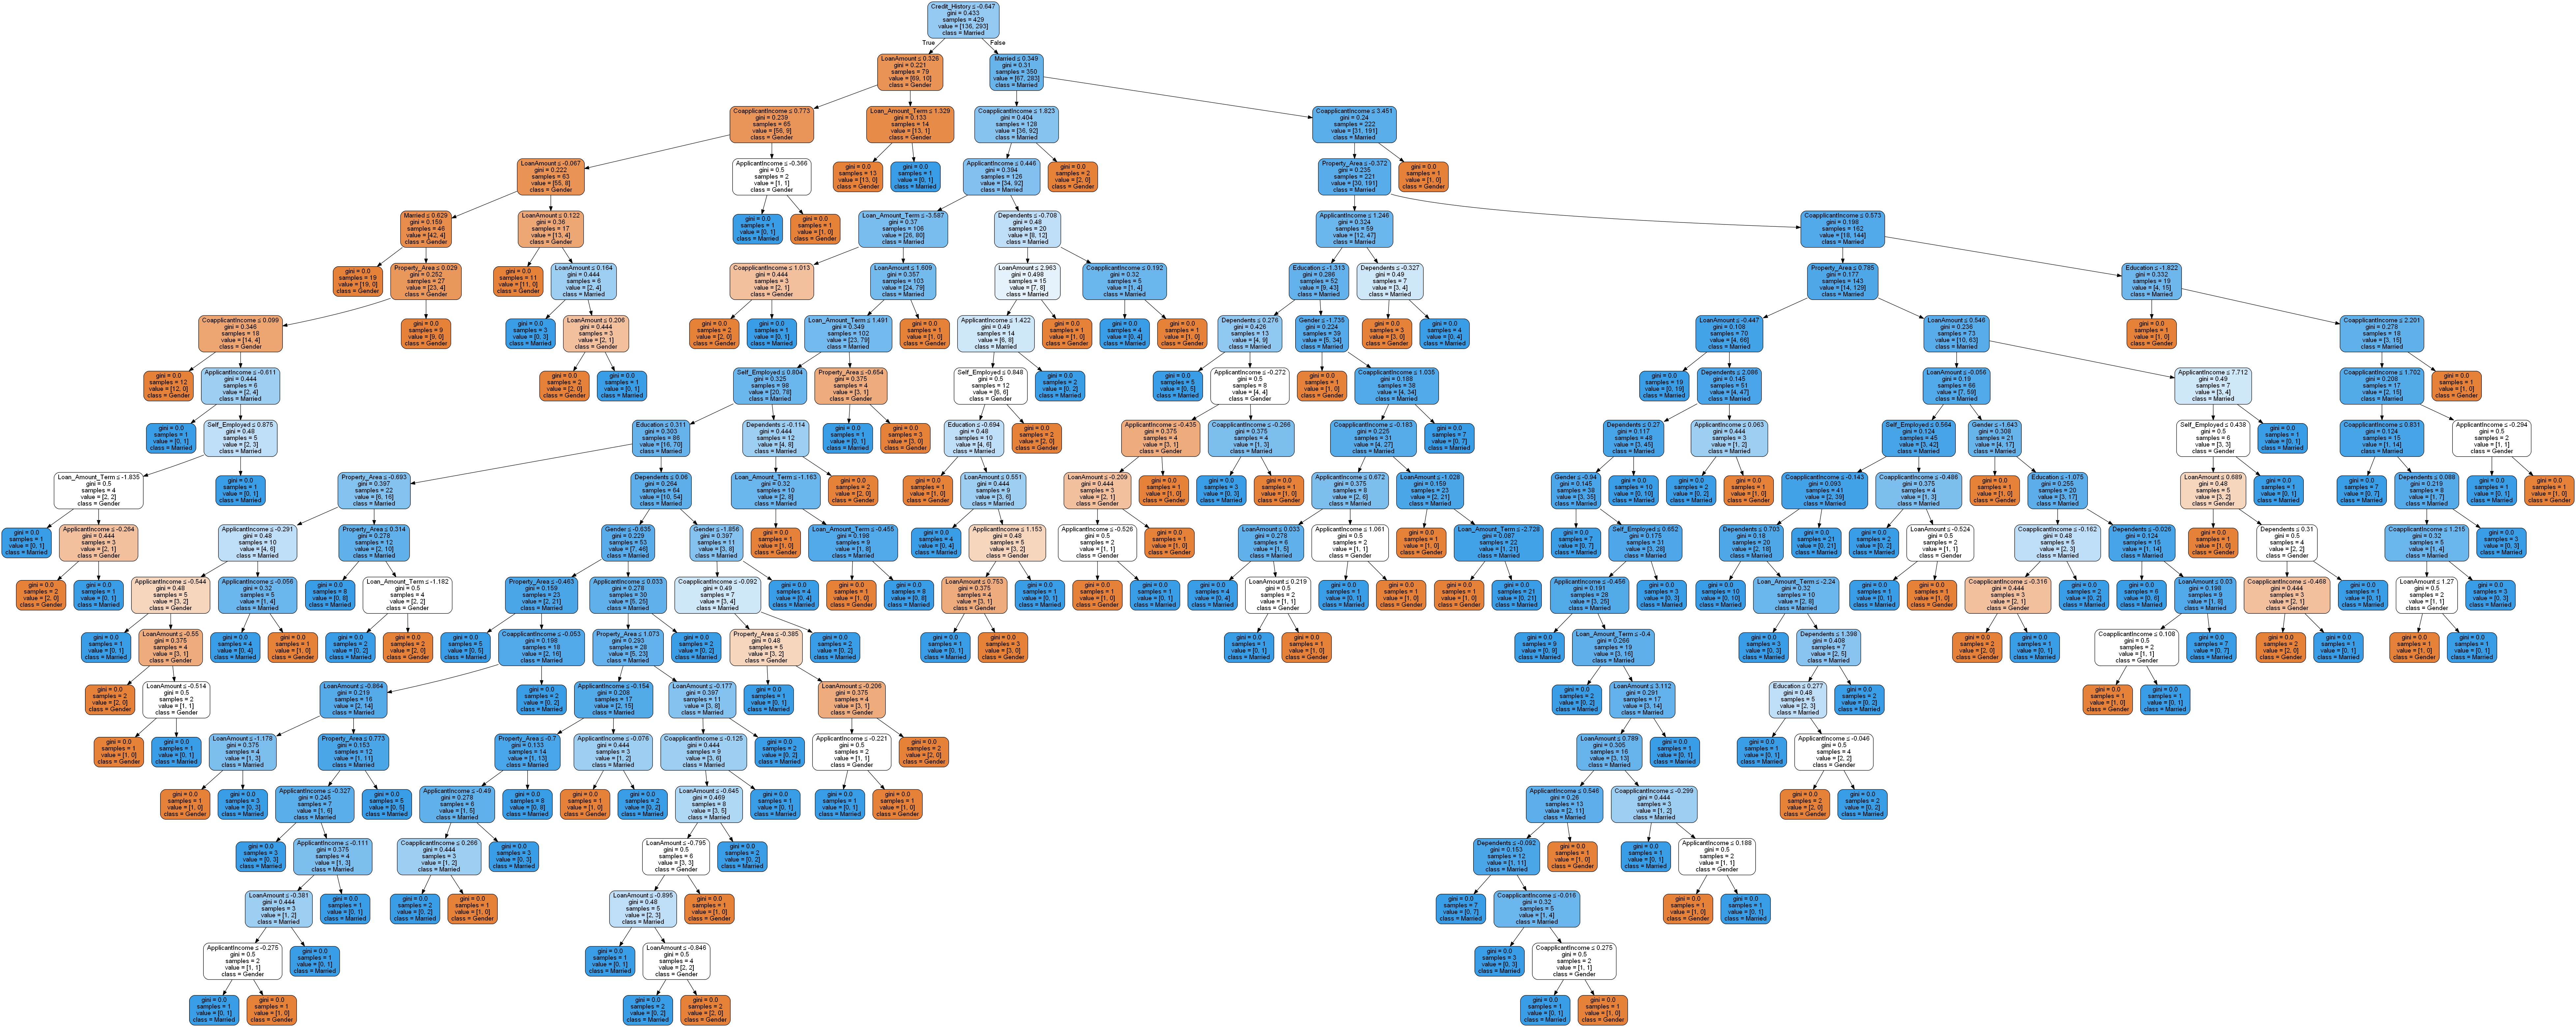

In [15]:
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image  

import os
import sys

def conda_fix(graph):
        path = os.path.join(sys.base_exec_prefix, "Library", "bin", "graphviz")
        paths = ("dot", "twopi", "neato", "circo", "fdp")
        paths = {p: os.path.join(path, "{}.exe".format(p)) for p in paths}
        graph.set_graphviz_executables(paths)
        
        
from sklearn import tree

buffer = StringIO()
tree.export_graphviz(dt_gini_random, out_file=buffer, 
                         feature_names=X.columns,  
                         class_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(buffer.getvalue())
conda_fix(graph)
graph.write_pdf("loan_tree_gini_random.pdf") 
Image(graph.create_png())

In [16]:
dt_entropy_random = DecisionTreeClassifier(criterion='entropy',random_state=5,splitter='random')
dt_entropy_random.fit(X_train_std, y_train)

print("Training set score DT_entropy_random: %f" % dt_entropy_random.score(X_train_std, y_train))
print("Test set score dt_entropy_random: %f" % dt_entropy_random.score(X_test_std, y_test))
print("Total score dt_entropy_random: %f" % dt_entropy_random.score(X_std, y))

print("Classification report for dt_entropy_random:\n%s\n"% (classification_report(y_test, dt_entropy_random.predict(X_test_std))))
print("Confusion matrix for dt_entropy_random on test:\n%s" % (confusion_matrix(y_test, dt_entropy_random.predict(X_test_std))))

print("Classification report for dt_entropy_random:\n%s\n"% (classification_report(y_train, dt_entropy_random.predict(X_train_std))))
print("Confusion matrix for dt_entropy_random on train:\n%s" % (confusion_matrix(y_train, dt_entropy_random.predict(X_train_std))))

print("Classification report for dt_entropy_random:\n%s\n"% (classification_report(y, dt_entropy_random.predict(X_std))))
print("Confusion matrix for dt_entropy_random on total:\n%s" % (confusion_matrix(y, dt_entropy_random.predict(X_std))))

from sklearn.model_selection import cross_val_score

cvs=cross_val_score(dt_entropy_random , X_std, y, cv=10)
print(cvs)

Training set score DT_entropy_random: 1.000000
Test set score dt_entropy_random: 0.740541
Total score dt_entropy_random: 0.921824
Classification report for dt_entropy_random:
              precision    recall  f1-score   support

           0       0.60      0.43      0.50        56
           1       0.78      0.88      0.82       129

   micro avg       0.74      0.74      0.74       185
   macro avg       0.69      0.65      0.66       185
weighted avg       0.73      0.74      0.73       185


Confusion matrix for dt_entropy_random on test:
[[ 24  32]
 [ 16 113]]
Classification report for dt_entropy_random:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00       293

   micro avg       1.00      1.00      1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429


Confusion matrix for dt_entropy_random on train:
[[13

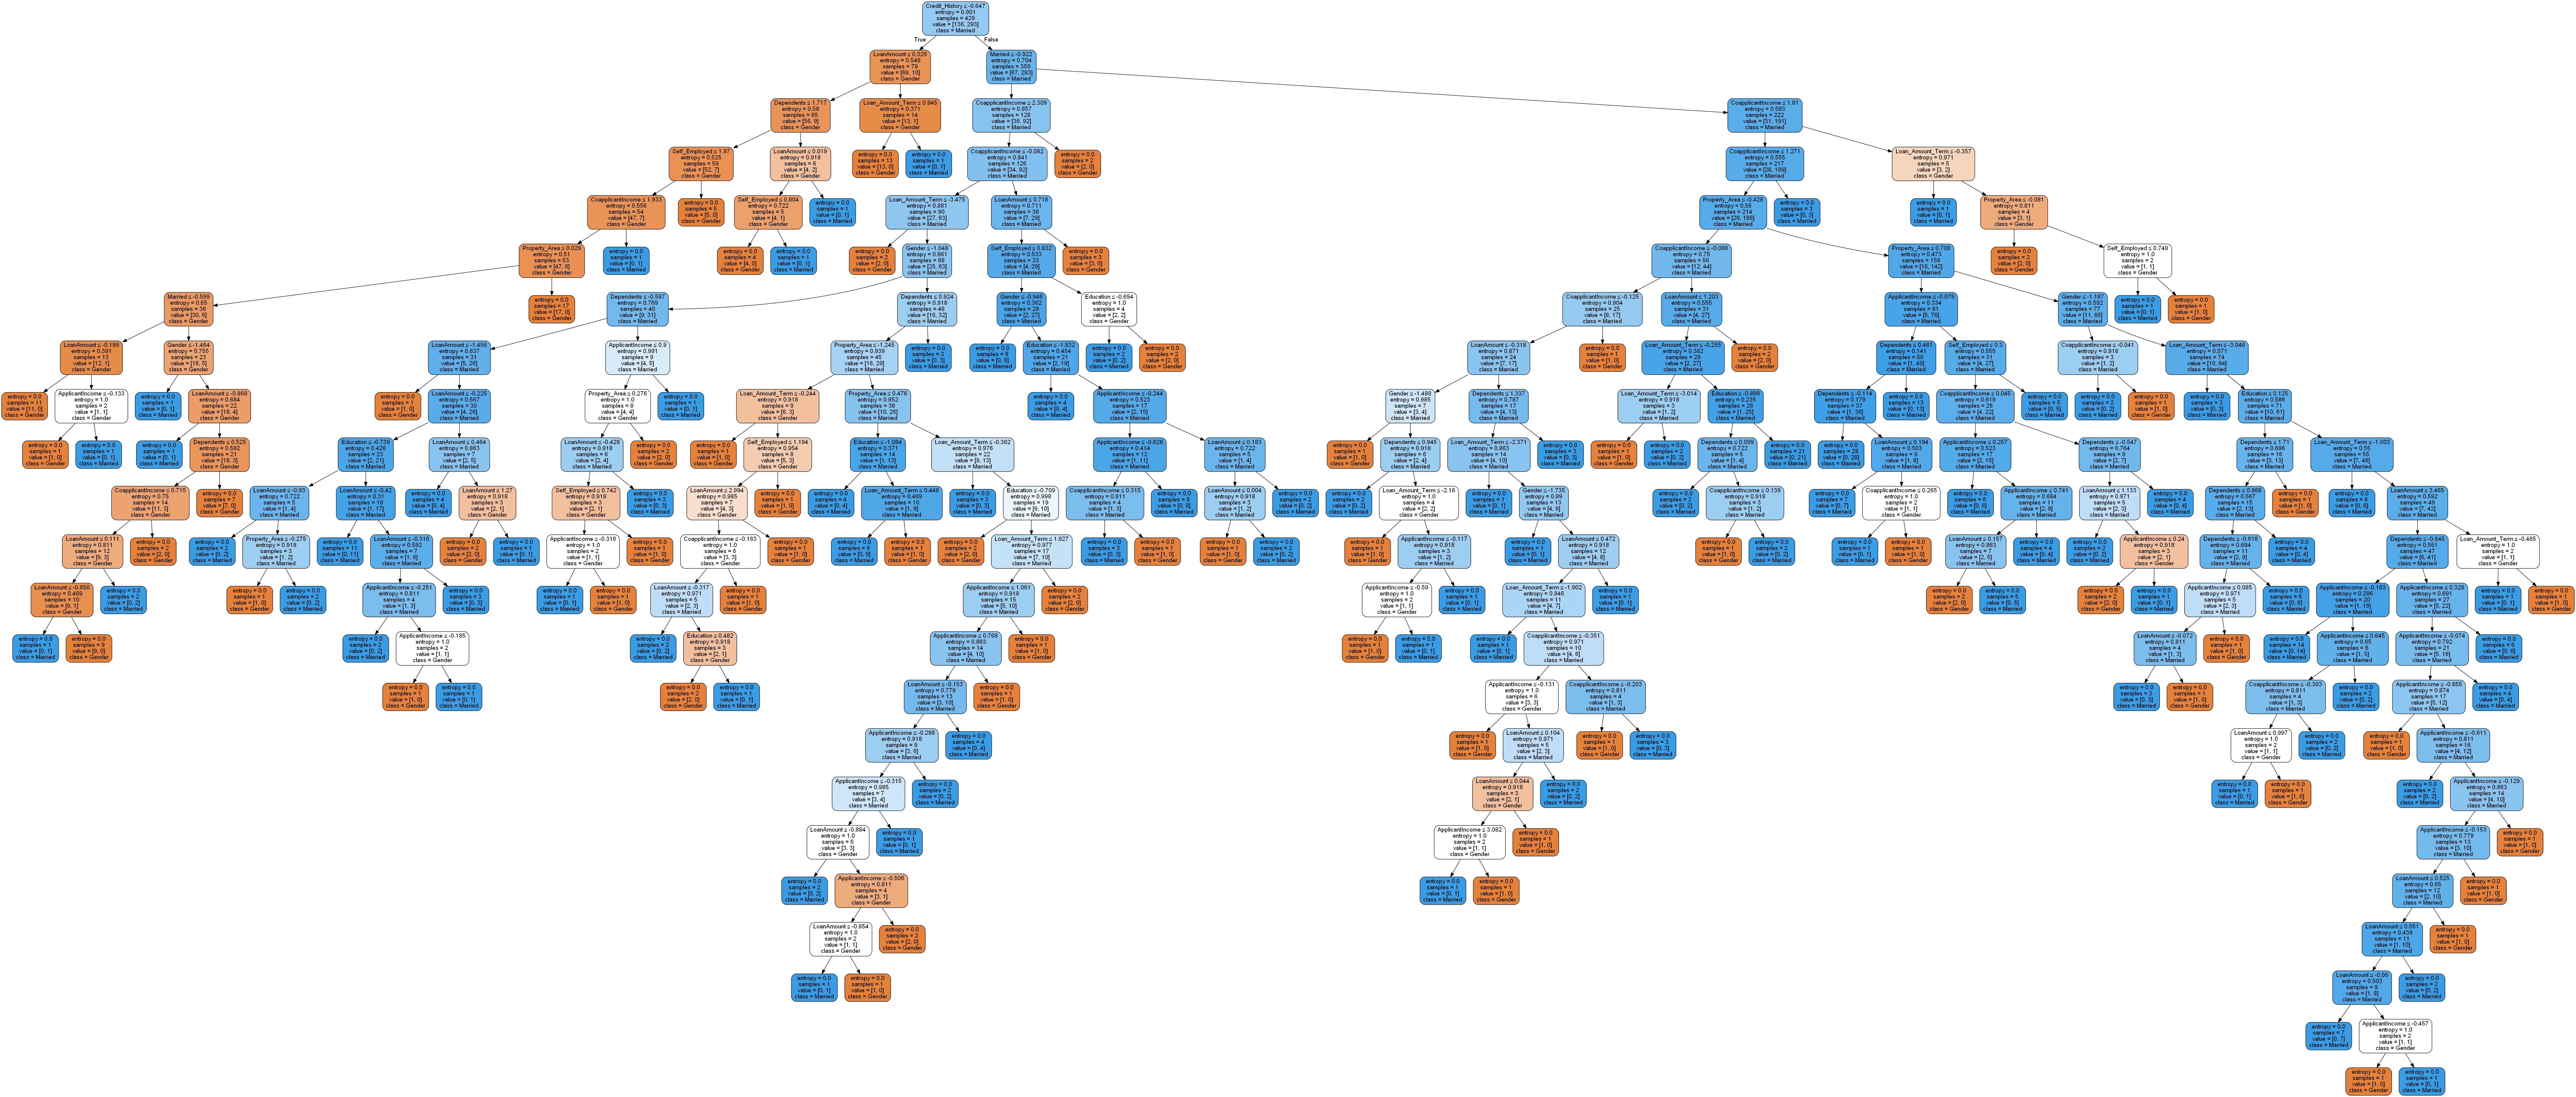

In [17]:
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image  

import os
import sys

def conda_fix(graph):
        path = os.path.join(sys.base_exec_prefix, "Library", "bin", "graphviz")
        paths = ("dot", "twopi", "neato", "circo", "fdp")
        paths = {p: os.path.join(path, "{}.exe".format(p)) for p in paths}
        graph.set_graphviz_executables(paths)
        
        
from sklearn import tree

buffer = StringIO()
tree.export_graphviz(dt_entropy_random, out_file=buffer, 
                         feature_names=X.columns,  
                         class_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(buffer.getvalue())
conda_fix(graph)
graph.write_pdf("loan_tree_entropy_random.pdf") 
Image(graph.create_png())

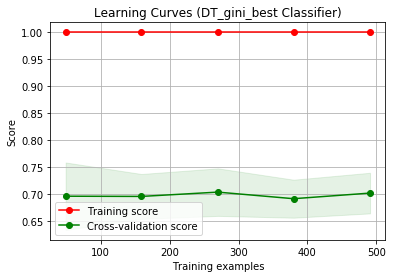

In [18]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
title = "Learning Curves (DT_gini_best Classifier)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

plot_learning_curve(dt_gini_best, title, X_std,y,ylim=None,cv=cv,n_jobs=4)
plt.show()

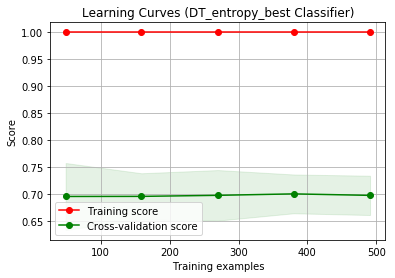

In [19]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
title = "Learning Curves (DT_entropy_best Classifier)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

plot_learning_curve(dt_entropy_best, title, X_std,y,ylim=None,cv=cv,n_jobs=4)
plt.show()

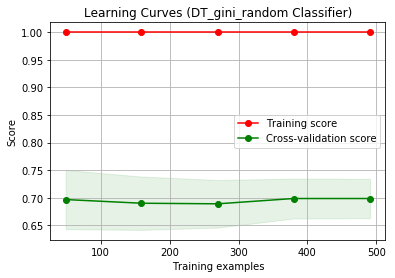

In [20]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
title = "Learning Curves (DT_gini_random Classifier)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

plot_learning_curve(dt_gini_random, title, X_std,y,ylim=None,cv=cv,n_jobs=4)
plt.show()

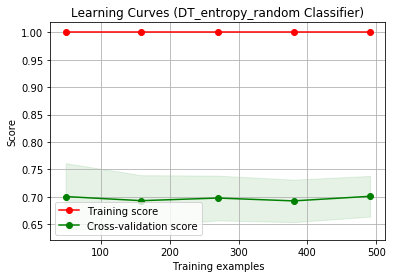

In [21]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
title = "Learning Curves (DT_entropy_random Classifier)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

plot_learning_curve(dt_entropy_random, title, X_std,y,ylim=None,cv=cv,n_jobs=4)
plt.show()

In [22]:
import seaborn as sns
from sklearn import metrics
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

In [23]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

C:\Users\Pritam\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\Pritam\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


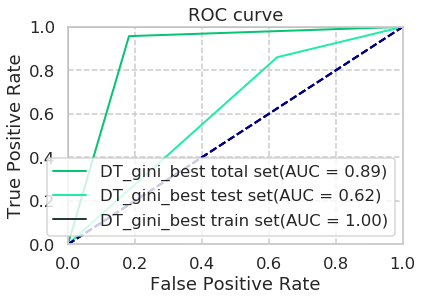

In [24]:
dt_gini_best_pred_total=dt_gini_best.predict(X_std)
dt_gini_best_pred_test=dt_gini_best.predict(X_test_std)
dt_gini_best_pred_train=dt_gini_best.predict(X_train_std)

dt_gini_best_pred_proba_total=dt_gini_best.predict_proba(X_std)[:,1]
dt_gini_best_pred_proba_test=dt_gini_best.predict_proba(X_test_std)[:,1]
dt_gini_best_pred_proba_train=dt_gini_best.predict_proba(X_train_std)[:,1]

plotAUC(y,dt_gini_best_pred_proba_total,'DT_gini_best total set')
plotAUC(y_test,dt_gini_best_pred_test,'DT_gini_best test set')
plotAUC(y_train,dt_gini_best_pred_train,'DT_gini_best train set')

plt.show()

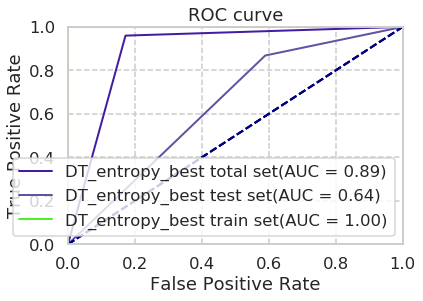

In [25]:
dt_entropy_best_pred_total=dt_entropy_best.predict(X_std)
dt_entropy_best_pred_test=dt_entropy_best.predict(X_test_std)
dt_entropy_best_pred_train=dt_entropy_best.predict(X_train_std)

dt_entropy_best_pred_proba_total=dt_entropy_best.predict_proba(X_std)[:,1]
dt_entropy_best_pred_proba_test=dt_entropy_best.predict_proba(X_test_std)[:,1]
dt_entropy_best_pred_proba_train=dt_entropy_best.predict_proba(X_train_std)[:,1]

plotAUC(y,dt_entropy_best_pred_proba_total,'DT_entropy_best total set')
plotAUC(y_test,dt_entropy_best_pred_test,'DT_entropy_best test set')
plotAUC(y_train,dt_entropy_best_pred_train,'DT_entropy_best train set')

plt.show()

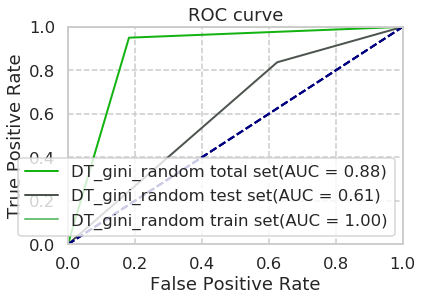

In [26]:
dt_gini_random_pred_total=dt_gini_random.predict(X_std)
dt_gini_random_pred_test=dt_gini_random.predict(X_test_std)
dt_gini_random_pred_train=dt_gini_random.predict(X_train_std)

dt_gini_random_pred_proba_total=dt_gini_random.predict_proba(X_std)[:,1]
dt_gini_random_pred_proba_test=dt_gini_random.predict_proba(X_test_std)[:,1]
dt_gini_random_pred_proba_train=dt_gini_random.predict_proba(X_train_std)[:,1]

plotAUC(y,dt_gini_random_pred_proba_total,'DT_gini_random total set')
plotAUC(y_test,dt_gini_random_pred_test,'DT_gini_random test set')
plotAUC(y_train,dt_gini_random_pred_train,'DT_gini_random train set')

plt.show()

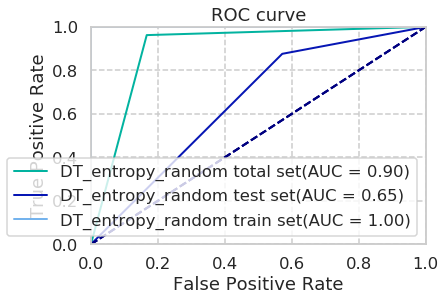

In [27]:
dt_entropy_random_pred_total=dt_entropy_random.predict(X_std)
dt_entropy_random_pred_test=dt_entropy_random.predict(X_test_std)
dt_entropy_random_pred_train=dt_entropy_random.predict(X_train_std)

dt_entropy_random_pred_proba_total=dt_entropy_random.predict_proba(X_std)[:,1]
dt_entropy_random_pred_proba_test=dt_entropy_random.predict_proba(X_test_std)[:,1]
dt_entropy_random_pred_proba_train=dt_entropy_random.predict_proba(X_train_std)[:,1]

plotAUC(y,dt_entropy_random_pred_proba_total,'DT_entropy_random total set')
plotAUC(y_test,dt_entropy_random_pred_test,'DT_entropy_random test set')
plotAUC(y_train,dt_entropy_random_pred_train,'DT_entropy_random train set')

plt.show()

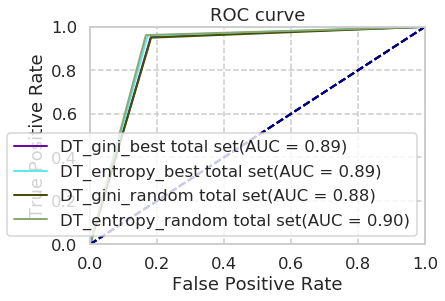

In [28]:
dt_gini_best_pred_total=dt_gini_best.predict(X_std)
dt_entropy_best_pred_total=dt_entropy_best.predict(X_std)
dt_gini_random_pred_total=dt_gini_random.predict(X_std)
dt_entropy_random_pred_total=dt_entropy_random.predict(X_std)

dt_gini_best_pred_proba_total=dt_gini_best.predict_proba(X_std)[:,1]
dt_entropy_best_pred_proba_total=dt_entropy_best.predict_proba(X_std)[:,1]
dt_gini_random_pred_proba_total=dt_gini_random.predict_proba(X_std)[:,1]
dt_entropy_random_pred_proba_total=dt_entropy_random.predict_proba(X_std)[:,1]

plotAUC(y,dt_gini_best_pred_proba_total,'DT_gini_best total set')
plotAUC(y,dt_entropy_best_pred_proba_total,'DT_entropy_best total set')
plotAUC(y,dt_gini_random_pred_proba_total,'DT_gini_random total set')
plotAUC(y,dt_entropy_random_pred_proba_total,'DT_entropy_random total set')

plt.show()

In [29]:
#storing all models
from sklearn.externals import joblib #dumping and loading model

joblib.dump(dt_gini_best,'dt_gini_best_model.joblib')
joblib.dump(dt_entropy_best,'dt_entropy_best_model.joblib')
joblib.dump(dt_gini_random,'dt_gini_random_model.joblib')
joblib.dump(dt_entropy_random,'dt_entropy_random_model.joblib')

['dt_entropy_random_model.joblib']